### lda를 활용한 토픽 모델링

- Countervectorizer 사용

- 데이터 읽어오기 (명사)

In [3]:
import pandas as pd

In [4]:
nouns_df = pd.read_csv('../datas/nouns_df.csv')
nouns_df['본문']

0        팀 이대성  122 117로 팀 허웅 제압 전성현 3점슛 9개 분전허웅  생애 첫 ...
1        제2의 진박감별사가 당 쥐락펴락  나경원 비판에 응수   국민의힘 장제원 의원  나...
2        양금희 국민의힘 의원 대구 북구갑 .                        대구...
3        김상훈 국민의힘 의원 대구 서구 .                        대구 ...
4        류성걸 국민의힘 의원 대구 동구갑 .                        류성...
                               ...                        
39940    우상혁이 20일 2023 부다페스트 세계육상선수권 남자 높이뛰기 예선에서 바를 넘고...
39941    중소벤처기업부  실장급 전보  중소기업정책실장 이대희  소상공인정책실장 원영준  국...
39942    유튜버 김용호씨. 유튜브 채널      강용석 나이트 라이브  캡처연예  출신 유튜...
39943    윤희근 경찰청장이 18일 충북 충주시 중앙경찰학교에서 열린 신임경찰 제312기 졸업...
39944    무더운 날씨를 기록한 지난 14일 서울 경복궁을 찾은 관광객들이 양산으로 햇볕을 피...
Name: 본문, Length: 39945, dtype: object

- 본문 내용이 작아서 삭제

- 4 2 키움

In [5]:
nouns_df = nouns_df[nouns_df['본문'] != '4 2 키움']
nouns_df.reset_index(drop=True, inplace=True)
nouns_df

,뉴스 식별자,일자,언론사,기고자,제목,통합 분류1,통합 분류2,통합 분류3,사건/사고 분류1,사건/사고 분류2,...,인물,위치,기관,키워드,특성추출(가중치순 상위 50개),본문,URL,분석제외 여부,명사,Topic
0,1.100611e+06,20230115,서울신문,홍지민,"하윤기, 덩크 9방에 생애 첫 올스타전 MVP",스포츠>축구,스포츠>농구_배구,스포츠>올림픽_아시안게임,사고>스포츠사고,NaN,...,NaN,"울산,전주,서울,준결승전,경기,영광,창원,아반도,필리핀,아시아,안양,대구,문성곤","한국가스공사,KGC,SK,kt,KCC,랜드리,LG,렌즈 아반도,아셈,삼성,현대모비스...","하윤기,덩크,생애,올스타전,MVP,이대성,제압,허웅,전성현,3점,분전,허웅,생애,3...","허웅,덩크,올스타전,3점,하윤기,이대성,kt,전성현,외국인,팬투표,덩크슛,9개,서울...",팀 이대성 122 117로 팀 허웅 제압 전성현 3점슛 9개 분전허웅 생애 첫 ...,http://www.seoul.co.kr/news/newsView.php?id=20...,NaN,"['이대성', '허웅', '제압', '성현', '점슛', '분전', '허웅', '생...",7
1,1.100611e+06,20230115,서울신문,신진호,"장제원, 나경원 향해 “제2의 유승민 되지 말기를”",정치>국회_정당,정치>선거,정치>청와대,NaN,NaN,...,"유승민,김기현,나경원,장제원,전,유일한,장,조원진,윤석열,유 전,마키아벨리","을,동구,파동,대구","친박,정부,친박계,파동,대한민국,진박감별사,새누리당,페이스북,국민의힘","장제원,나경원,제2,유승민,제2,진박감별사,나경원,비판,응수,나경원,국민,의원,출마...","감별사,새누리당,유승민,박근혜,나경원,마키아벨리,친박,진박,진박감별사,페이스북,장제...",제2의 진박감별사가 당 쥐락펴락 나경원 비판에 응수 국민의힘 장제원 의원 나...,http://www.seoul.co.kr/news/newsView.php?id=20...,NaN,"['진박', '감별', '사가', '쥐락펴락', '나경원', '비판', '응수', ...",2
2,1.500601e+06,20230115,매일신문,이수현,[대구 국회의원 평가 여론조사] 북구갑 양금희 당직 맡아 국회평가 높아,정치>국회_정당,NaN,NaN,NaN,NaN,...,"양금희,윤석열,홍준표","대구,대구시,대야,부여,북구,북구갑,선봉","국민의힘,국회,더불어민주당,매일신문,정의당,중앙선거여론조사심의위원회,한길리서치,행정안전부","북구갑,양금희,당직,국회평가,59%,북구갑,주민,59%,대통령,국정,수행,긍정,시장...","북구갑,대구,양금희,응답자,ars,한길리서치,홈페이지,행정안전부,18세,여론조사,부...",양금희 국민의힘 의원 대구 북구갑 . 대구...,https://news.imaeil.com/page/view/202301152129...,NaN,"['양금', '국민', '의원', '대구', '북구', '대구', '북구', '주민...",2
3,1.500601e+06,20230115,매일신문,이수현,[대구 국회의원 평가 여론조사] 서구 김상훈 3선 의정활동 평가 무난,지역>대구,지역>대전,정치>국회_정당,NaN,NaN,...,"김,김상훈,윤석열,홍준표","대구,대구시,부여,서구","국민의힘,더불어민주당,매일신문,정의당,중앙선거여론조사심의위원회,한길리서치,행정안전부","서구,김상훈,3선,무난,의정,활동,평가,대통령,국정수행,62.1%,30.4%,긍정,...","대구,김상훈,ars,한길리서치,홈페이지,행정안전부,응답자,3선,홍준표,부여,정의당,...",김상훈 국민의힘 의원 대구 서구 . 대구 ...,https://news.imaeil.com/page/view/202301152122...,NaN,"['김상훈', '국민', '의원', '대구', '서구', '대구', '서구', '주...",2
4,1.500601e+06,20230115,매일신문,이수현,[대구 국회의원 평가 여론조사] 동구갑 류성걸 의원,지역>대구,지역>대전,정치>국회_정당,NaN,NaN,...,"류성걸,윤석열,홍준표","대구,대구시,동구,동구갑,부여","국민의힘,더불어민주당,매일신문,정의당,중앙선거여론조사심의위원회,한길리서치,행정안전부","의원,동구갑,류성걸,재선,평균치,의원,류성걸,국민의힘,전반적,의정,활동,주민들,대구...","동구갑,류성걸,대구,국민의힘,동구,ars,한길리서치,홈페이지,행정안전부,18세,지역...",류성걸 국민의힘 의원 대구 동구갑 . 류성...,https://news.imaeil.com/page/view/202301152115...,NaN,"['류성걸', '국민', '의원', '대구', '류성걸', '국민', '의원', '...",2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39940,2.100311e+06,20230821,서울경제,서재원 기자,1년 전 銀을 金으로 우상혁 '위대한 도전',스포츠>올림픽_아시안게임,스포츠>축구,스포츠>월드컵,NaN,NaN,...,"김현섭,우상혁","독일,미국,부다페스트,도하,일본,유진 세계선수권대회,한국,세계선수권,뮌헨,텍사스,쿠...","아카마쓰,용인시청","1년,우상혁,도전,세계,선수권,높이뛰기,우승,도전,바르심,무타즈,에사,32,저본,해...","우상혁,한국,세계선수권,미국,해리슨,높이뛰기,선수권,바르심,런던,다이아몬드리그,유진...",우상혁이 20일 2023 부다페스트 세계육상선수권 남자 높이뛰기 예선에서 바를 넘고...,http://www.sedaily.com/NewsView/29THRF514Y,NaN,"['우상혁', '부다페스트', '세계', '육상', '선수권', '남자', '높이뛰...",7
39941,2.100311e+06,20230820,서울경제,여론독자부,[인사] 중소벤처기업부 외,지역>대구,경제>취업_창업,지역>전북,NaN,NaN,...,"이용주,이대희,박금철,김진명,이현조,조만희,이형철,김현곤,원영준,강영규,김언성,박정현","대구,경북지방중소벤처","△공공정책국장,△중앙노동위원회,기획재정부,△재정관리국장,고용노동부,중소벤처기업부","중소벤처기업부,전보,중소,벤처,기업부,실장,중소기업정책실장,전보,이대희,소상공인,정...","정책관,김현곤,박금철,조만희,이용주,중소벤처기업부,김언성,김진명,이형철,이대희,원영...",중소벤처기업부 실장급 전보 중소기업정책실장 이대희 소상공인정책실장 원영준 국...,http://www.sedaily.com/NewsView/29THBVO7B0,예외,"['중소', '벤처기업', '실장', '전보', '중소기업', '정책', '실장',...",1
39942,2.100311e+06,20230820,서울경제,김경훈 기자,"'명예훼손 실형' 김용호, 조국 김건모 전처에 사과 ""깊이 반성""",사회>미디어,사회>사건_사고,NaN,NaN,NaN,...,"김,조,여배우,김건모,강용석,조국,김용호",대구,"유튜브,가로세로연구소,KNL,법무부,법원,유튜버","명예,훼손,실형,김용호,조국,김건모,전처,사과,반성,연예,조국,법무부,장관,가수,김...","김씨,김건모,김용호,사생활,장씨,연구소,가로세로,유튜브,가로세로연구소,유튜버,연예부...",유튜버 김용호씨. 유튜브 채널 강용석 나이트 라이브 캡처연예 출신 유튜...,http://www.sedaily.com/NewsView/29THC9PDCP,NaN,"['유튜버', '김용호', '유튜브', '채널', '강용석', '나이트', '라이브...",4
39943,2.100311e+06,20230820,서울경제,이승령 기자,이러니 치안 불안할 수 밖에 현장 누빌 순경 1.4만명 부족,지역>광주,지역>부산,지역>울산,NaN,NaN,...,"순경,정우택","경기북,경기남부,서울,부산,대구,인천,경남,지구대","서울경찰청,행정안전위원회,국회,경찰청,경창청,국민의힘,비간부","치안,불안,현장,1.4,누빌,순경,1.4,부족,경감,경위,경정,간부직,정원,사건,시...","경찰관,경찰청,퇴직자,서울,시도경찰청,치안현장,경찰관들,정우택,3만,6급,국민의힘,...",윤희근 경찰청장

- 데이터 저장

In [6]:
nouns_df.to_csv('../datas/nouns_df.csv', index=False, encoding='utf-8')

- 불러오기

In [7]:
nouns_df = pd.read_csv('../datas/nouns_df.csv')
nouns_df

,뉴스 식별자,일자,언론사,기고자,제목,통합 분류1,통합 분류2,통합 분류3,사건/사고 분류1,사건/사고 분류2,...,인물,위치,기관,키워드,특성추출(가중치순 상위 50개),본문,URL,분석제외 여부,명사,Topic
0,1.100611e+06,20230115,서울신문,홍지민,"하윤기, 덩크 9방에 생애 첫 올스타전 MVP",스포츠>축구,스포츠>농구_배구,스포츠>올림픽_아시안게임,사고>스포츠사고,NaN,...,NaN,"울산,전주,서울,준결승전,경기,영광,창원,아반도,필리핀,아시아,안양,대구,문성곤","한국가스공사,KGC,SK,kt,KCC,랜드리,LG,렌즈 아반도,아셈,삼성,현대모비스...","하윤기,덩크,생애,올스타전,MVP,이대성,제압,허웅,전성현,3점,분전,허웅,생애,3...","허웅,덩크,올스타전,3점,하윤기,이대성,kt,전성현,외국인,팬투표,덩크슛,9개,서울...",팀 이대성 122 117로 팀 허웅 제압 전성현 3점슛 9개 분전허웅 생애 첫 ...,http://www.seoul.co.kr/news/newsView.php?id=20...,NaN,"['이대성', '허웅', '제압', '성현', '점슛', '분전', '허웅', '생...",7
1,1.100611e+06,20230115,서울신문,신진호,"장제원, 나경원 향해 “제2의 유승민 되지 말기를”",정치>국회_정당,정치>선거,정치>청와대,NaN,NaN,...,"유승민,김기현,나경원,장제원,전,유일한,장,조원진,윤석열,유 전,마키아벨리","을,동구,파동,대구","친박,정부,친박계,파동,대한민국,진박감별사,새누리당,페이스북,국민의힘","장제원,나경원,제2,유승민,제2,진박감별사,나경원,비판,응수,나경원,국민,의원,출마...","감별사,새누리당,유승민,박근혜,나경원,마키아벨리,친박,진박,진박감별사,페이스북,장제...",제2의 진박감별사가 당 쥐락펴락 나경원 비판에 응수 국민의힘 장제원 의원 나...,http://www.seoul.co.kr/news/newsView.php?id=20...,NaN,"['진박', '감별', '사가', '쥐락펴락', '나경원', '비판', '응수', ...",2
2,1.500601e+06,20230115,매일신문,이수현,[대구 국회의원 평가 여론조사] 북구갑 양금희 당직 맡아 국회평가 높아,정치>국회_정당,NaN,NaN,NaN,NaN,...,"양금희,윤석열,홍준표","대구,대구시,대야,부여,북구,북구갑,선봉","국민의힘,국회,더불어민주당,매일신문,정의당,중앙선거여론조사심의위원회,한길리서치,행정안전부","북구갑,양금희,당직,국회평가,59%,북구갑,주민,59%,대통령,국정,수행,긍정,시장...","북구갑,대구,양금희,응답자,ars,한길리서치,홈페이지,행정안전부,18세,여론조사,부...",양금희 국민의힘 의원 대구 북구갑 . 대구...,https://news.imaeil.com/page/view/202301152129...,NaN,"['양금', '국민', '의원', '대구', '북구', '대구', '북구', '주민...",2
3,1.500601e+06,20230115,매일신문,이수현,[대구 국회의원 평가 여론조사] 서구 김상훈 3선 의정활동 평가 무난,지역>대구,지역>대전,정치>국회_정당,NaN,NaN,...,"김,김상훈,윤석열,홍준표","대구,대구시,부여,서구","국민의힘,더불어민주당,매일신문,정의당,중앙선거여론조사심의위원회,한길리서치,행정안전부","서구,김상훈,3선,무난,의정,활동,평가,대통령,국정수행,62.1%,30.4%,긍정,...","대구,김상훈,ars,한길리서치,홈페이지,행정안전부,응답자,3선,홍준표,부여,정의당,...",김상훈 국민의힘 의원 대구 서구 . 대구 ...,https://news.imaeil.com/page/view/202301152122...,NaN,"['김상훈', '국민', '의원', '대구', '서구', '대구', '서구', '주...",2
4,1.500601e+06,20230115,매일신문,이수현,[대구 국회의원 평가 여론조사] 동구갑 류성걸 의원,지역>대구,지역>대전,정치>국회_정당,NaN,NaN,...,"류성걸,윤석열,홍준표","대구,대구시,동구,동구갑,부여","국민의힘,더불어민주당,매일신문,정의당,중앙선거여론조사심의위원회,한길리서치,행정안전부","의원,동구갑,류성걸,재선,평균치,의원,류성걸,국민의힘,전반적,의정,활동,주민들,대구...","동구갑,류성걸,대구,국민의힘,동구,ars,한길리서치,홈페이지,행정안전부,18세,지역...",류성걸 국민의힘 의원 대구 동구갑 . 류성...,https://news.imaeil.com/page/view/202301152115...,NaN,"['류성걸', '국민', '의원', '대구', '류성걸', '국민', '의원', '...",2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39940,2.100311e+06,20230821,서울경제,서재원 기자,1년 전 銀을 金으로 우상혁 '위대한 도전',스포츠>올림픽_아시안게임,스포츠>축구,스포츠>월드컵,NaN,NaN,...,"김현섭,우상혁","독일,미국,부다페스트,도하,일본,유진 세계선수권대회,한국,세계선수권,뮌헨,텍사스,쿠...","아카마쓰,용인시청","1년,우상혁,도전,세계,선수권,높이뛰기,우승,도전,바르심,무타즈,에사,32,저본,해...","우상혁,한국,세계선수권,미국,해리슨,높이뛰기,선수권,바르심,런던,다이아몬드리그,유진...",우상혁이 20일 2023 부다페스트 세계육상선수권 남자 높이뛰기 예선에서 바를 넘고...,http://www.sedaily.com/NewsView/29THRF514Y,NaN,"['우상혁', '부다페스트', '세계', '육상', '선수권', '남자', '높이뛰...",7
39941,2.100311e+06,20230820,서울경제,여론독자부,[인사] 중소벤처기업부 외,지역>대구,경제>취업_창업,지역>전북,NaN,NaN,...,"이용주,이대희,박금철,김진명,이현조,조만희,이형철,김현곤,원영준,강영규,김언성,박정현","대구,경북지방중소벤처","△공공정책국장,△중앙노동위원회,기획재정부,△재정관리국장,고용노동부,중소벤처기업부","중소벤처기업부,전보,중소,벤처,기업부,실장,중소기업정책실장,전보,이대희,소상공인,정...","정책관,김현곤,박금철,조만희,이용주,중소벤처기업부,김언성,김진명,이형철,이대희,원영...",중소벤처기업부 실장급 전보 중소기업정책실장 이대희 소상공인정책실장 원영준 국...,http://www.sedaily.com/NewsView/29THBVO7B0,예외,"['중소', '벤처기업', '실장', '전보', '중소기업', '정책', '실장',...",1
39942,2.100311e+06,20230820,서울경제,김경훈 기자,"'명예훼손 실형' 김용호, 조국 김건모 전처에 사과 ""깊이 반성""",사회>미디어,사회>사건_사고,NaN,NaN,NaN,...,"김,조,여배우,김건모,강용석,조국,김용호",대구,"유튜브,가로세로연구소,KNL,법무부,법원,유튜버","명예,훼손,실형,김용호,조국,김건모,전처,사과,반성,연예,조국,법무부,장관,가수,김...","김씨,김건모,김용호,사생활,장씨,연구소,가로세로,유튜브,가로세로연구소,유튜버,연예부...",유튜버 김용호씨. 유튜브 채널 강용석 나이트 라이브 캡처연예 출신 유튜...,http://www.sedaily.com/NewsView/29THC9PDCP,NaN,"['유튜버', '김용호', '유튜브', '채널', '강용석', '나이트', '라이브...",4
39943,2.100311e+06,20230820,서울경제,이승령 기자,이러니 치안 불안할 수 밖에 현장 누빌 순경 1.4만명 부족,지역>광주,지역>부산,지역>울산,NaN,NaN,...,"순경,정우택","경기북,경기남부,서울,부산,대구,인천,경남,지구대","서울경찰청,행정안전위원회,국회,경찰청,경창청,국민의힘,비간부","치안,불안,현장,1.4,누빌,순경,1.4,부족,경감,경위,경정,간부직,정원,사건,시...","경찰관,경찰청,퇴직자,서울,시도경찰청,치안현장,경찰관들,정우택,3만,6급,국민의힘,...",윤희근 경찰청장

#### CounterVectorizer 방법

In [8]:
import numpy as np
from konlpy.tag import Kkma
from konlpy.tag import Okt
import re
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from tqdm import tqdm

In [9]:
# 지우고 싶은 단어가 있을 경우
stop_words = ['대구', '경북', '전국', '대구시', '서울', '지역', '오늘', 
              '무단', '배포', '금지', '저작권', '내일', '광주', 
              '강원','우리','위해','지금','지난','지점','대한','지난해',
              '제주', '오후', '아침', '경기', '부산', '코로나', '제공', '대해']

In [10]:
cv = CountVectorizer(stop_words=stop_words)
nouns_df['명사'].fillna('', inplace=True)  # Replace NaN with an empty string

dtm = cv.fit_transform(nouns_df['명사'])

In [11]:
dtm

<39945x69467 sparse matrix of type '<class 'numpy.int64'>'
	with 4025785 stored elements in Compressed Sparse Row format>

In [12]:
from sklearn.decomposition import LatentDirichletAllocation

lda = LatentDirichletAllocation(n_components=7, random_state=42) # 10개로 분류하기로 함
lda.fit(dtm)

LatentDirichletAllocation(n_components=7, random_state=42)

- 토픽 7개 저장

In [13]:
topicList = []
for n, i in enumerate(lda.components_): # 인덱스, 값
    idx = np.argsort(i)[::-1][:7] # 낮은 순
    topic = cv.get_feature_names_out()[idx] # 0번 데이터는 3번째 가중치가 낮았다는 뜻
    print(f'Topic {n+1} : {topic}') # 1번 토픽 많은 순서, 2번 많은 순서
    topicList.append(topic)

Topic 1 : ['아파트' '주택' '가구' '은행' '가격' '하락' '증가']
Topic 2 : ['의원' '국민' '대통령' '대표' '민주당' '후보' '시장']
Topic 3 : ['사업' '산업' '기업' '지원' '교육' '공항' '추진']
Topic 4 : ['경찰' '혐의' '사건' '마약' '수사' '사람' '범죄']
Topic 5 : ['병원' '안전' '의료' '발생' '피해' '지원' '환자']
Topic 6 : ['기온' '예상' '도로' '날씨' '오전' '남부' '최고']
Topic 7 : ['문화' '행사' '공연' '축제' '한국' '예술' '작품']


- 1 : 부동산
- 2 : 정치 이슈
- 3 : 정책
- 4 : 사건 사고 범죄
- 5 : 건강 및 안전
- 6 : 날씨 및 기상
- 7 : 문화와 예술
- 8 : 기타

- 하나의 기사 본문에 대해서만 카운터벡터라이즈 실행

In [14]:
nouns_df.isna().sum()

뉴스 식별자                   0
일자                       0
언론사                      0
기고자                   1225
제목                       0
통합 분류1                   0
통합 분류2                6187
통합 분류3               11487
사건/사고 분류1            32518
사건/사고 분류2            38162
사건/사고 분류3            39467
인물                   18128
위치                     707
기관                    1131
키워드                      0
특성추출(가중치순 상위 50개)        0
본문                       0
URL                      0
분석제외 여부              37140
명사                       0
Topic                    0
dtype: int64

In [15]:
dtm_df = pd.DataFrame(dtm[0].toarray(), columns=cv.get_feature_names_out())

In [16]:
dtm_df

,가가,가가린,가가호호,가각,가감,가객,가거도,가거도항,가건물,가게,...,힙스,힙스터,힙시트,힙입어,힙지,힙하,힙함,힙합,힙해,힛집
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [17]:
import json

In [18]:
stop_words = ['대구', '경북', '전국', '대구시', '서울', '지역', '오늘', '무단', '배포', '금지', '저작권', '내일', '광주', '강원','우리','위해','지금','지난','지점','대한','지난해','제주', '오후', '아침', '경기', '부산', '코로나', '제공', '대해']
max_value_list = []
max_index_list = []

# Initialize CountVectorizer only once before the loop
cv = CountVectorizer(stop_words=stop_words)

for i in tqdm(range(len(nouns_df['명사']))):
    document = nouns_df['명사'].iloc[i]
    
    _str = document.replace("\'","\"")
    _list1 = json.loads(_str)

    if len(_list1) > 0:
        # Join the list of strings into a single string
        combined_text = ' '.join(_list1)
        dtm = cv.fit_transform([combined_text])
        dtm_df = pd.DataFrame(dtm.toarray(), columns=cv.get_feature_names_out())

        total_sum = []
        for j in range(len(topicList)):
            total_sum.append(dtm_df.loc[:, dtm_df.columns.isin(topicList[j])].sum(axis=1).values[0])

        max_value = max(total_sum)
        max_index = total_sum.index(max_value) + 1
    else:
        max_value = 0
        max_index = 8

    max_value_list.append(max_value)
    max_index_list.append(max_index)

  0%|          | 13/39945 [00:00<05:50, 113.91it/s]

100%|██████████| 39945/39945 [02:57<00:00, 224.87it/s]


In [19]:
len(max_index_list)

39945

In [20]:
len(max_value_list)

39945

In [21]:
max_index_list

[7,
 2,
 2,
 2,
 2,
 2,
 2,
 4,
 2,
 2,
 1,
 6,
 5,
 3,
 7,
 7,
 6,
 2,
 5,
 3,
 3,
 1,
 1,
 6,
 2,
 7,
 3,
 1,
 7,
 4,
 3,
 3,
 3,
 6,
 3,
 2,
 3,
 4,
 3,
 5,
 3,
 2,
 6,
 1,
 6,
 6,
 3,
 1,
 7,
 5,
 3,
 6,
 7,
 6,
 6,
 6,
 2,
 1,
 1,
 7,
 3,
 6,
 3,
 5,
 6,
 3,
 7,
 6,
 6,
 5,
 6,
 2,
 1,
 3,
 3,
 2,
 7,
 2,
 5,
 1,
 3,
 2,
 2,
 6,
 1,
 1,
 5,
 6,
 7,
 2,
 3,
 6,
 2,
 3,
 5,
 3,
 2,
 2,
 1,
 3,
 5,
 3,
 2,
 3,
 3,
 3,
 2,
 3,
 6,
 2,
 7,
 2,
 6,
 3,
 1,
 2,
 3,
 3,
 1,
 1,
 2,
 2,
 5,
 6,
 7,
 2,
 6,
 5,
 3,
 3,
 6,
 2,
 2,
 2,
 3,
 1,
 2,
 2,
 2,
 3,
 3,
 2,
 7,
 7,
 6,
 1,
 3,
 3,
 6,
 4,
 2,
 3,
 2,
 3,
 3,
 6,
 6,
 3,
 4,
 1,
 3,
 3,
 3,
 6,
 2,
 3,
 2,
 3,
 2,
 5,
 1,
 5,
 2,
 3,
 2,
 2,
 3,
 5,
 3,
 6,
 3,
 2,
 3,
 3,
 5,
 1,
 5,
 2,
 7,
 1,
 2,
 2,
 2,
 2,
 2,
 1,
 6,
 2,
 2,
 3,
 6,
 3,
 2,
 1,
 2,
 3,
 1,
 2,
 3,
 7,
 6,
 2,
 7,
 1,
 4,
 2,
 2,
 3,
 4,
 2,
 3,
 7,
 2,
 1,
 2,
 2,
 1,
 3,
 2,
 3,
 3,
 7,
 4,
 3,
 2,
 5,
 2,
 3,
 5,
 3,
 7,
 3,
 3,
 6,
 3,
 6,
 3,
 3,
 2,
 3,


- 각 인덱스 (토픽)가 몇 개 있는지

In [22]:
from collections import Counter

# Use Counter to count occurrences
element_counts = Counter(max_index_list)

# Print the counts
for element, count in element_counts.items():
    print(f"{element}: {count}")

7: 4570
2: 7171
4: 3741
1: 5125
6: 6506
5: 3726
3: 9106


- 각 토픽의 빈도수에 대한 그래프

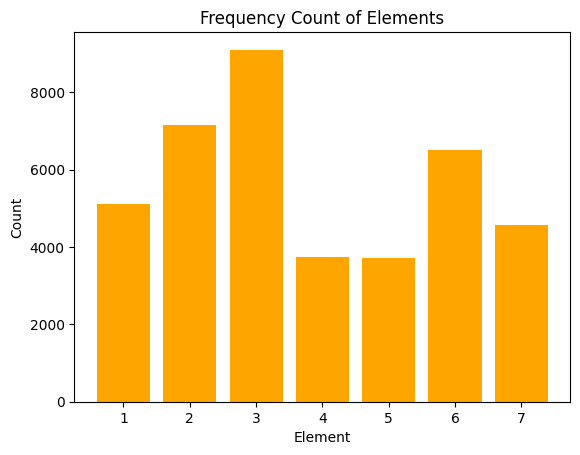

In [26]:
import matplotlib.pyplot as plt

# Your Counter object
element_counts = Counter(max_index_list)

# Extract elements and counts for plotting
elements = list(element_counts.keys())
counts = list(element_counts.values())

# Plot the bar graph
plt.bar(elements, counts, color='orange')

# Add labels and title
plt.xlabel('Element')
plt.ylabel('Count')
plt.title('Frequency Count of Elements')

# Show the plot
plt.show()

- nouns_df에 토픽 열 합치기

In [24]:
nouns_df['Topic'] = max_index_list
nouns_df.to_csv('../datas/nouns_df_topic_c.csv', index=False, encoding='utf-8')

- 불러오기

In [25]:
nouns_df_topic_c = pd.read_csv('../datas/nouns_df_topic_c.csv')
nouns_df_topic_c

,뉴스 식별자,일자,언론사,기고자,제목,통합 분류1,통합 분류2,통합 분류3,사건/사고 분류1,사건/사고 분류2,...,인물,위치,기관,키워드,특성추출(가중치순 상위 50개),본문,URL,분석제외 여부,명사,Topic
0,1.100611e+06,20230115,서울신문,홍지민,"하윤기, 덩크 9방에 생애 첫 올스타전 MVP",스포츠>축구,스포츠>농구_배구,스포츠>올림픽_아시안게임,사고>스포츠사고,NaN,...,NaN,"울산,전주,서울,준결승전,경기,영광,창원,아반도,필리핀,아시아,안양,대구,문성곤","한국가스공사,KGC,SK,kt,KCC,랜드리,LG,렌즈 아반도,아셈,삼성,현대모비스...","하윤기,덩크,생애,올스타전,MVP,이대성,제압,허웅,전성현,3점,분전,허웅,생애,3...","허웅,덩크,올스타전,3점,하윤기,이대성,kt,전성현,외국인,팬투표,덩크슛,9개,서울...",팀 이대성 122 117로 팀 허웅 제압 전성현 3점슛 9개 분전허웅 생애 첫 ...,http://www.seoul.co.kr/news/newsView.php?id=20...,NaN,"['이대성', '허웅', '제압', '성현', '점슛', '분전', '허웅', '생...",7
1,1.100611e+06,20230115,서울신문,신진호,"장제원, 나경원 향해 “제2의 유승민 되지 말기를”",정치>국회_정당,정치>선거,정치>청와대,NaN,NaN,...,"유승민,김기현,나경원,장제원,전,유일한,장,조원진,윤석열,유 전,마키아벨리","을,동구,파동,대구","친박,정부,친박계,파동,대한민국,진박감별사,새누리당,페이스북,국민의힘","장제원,나경원,제2,유승민,제2,진박감별사,나경원,비판,응수,나경원,국민,의원,출마...","감별사,새누리당,유승민,박근혜,나경원,마키아벨리,친박,진박,진박감별사,페이스북,장제...",제2의 진박감별사가 당 쥐락펴락 나경원 비판에 응수 국민의힘 장제원 의원 나...,http://www.seoul.co.kr/news/newsView.php?id=20...,NaN,"['진박', '감별', '사가', '쥐락펴락', '나경원', '비판', '응수', ...",2
2,1.500601e+06,20230115,매일신문,이수현,[대구 국회의원 평가 여론조사] 북구갑 양금희 당직 맡아 국회평가 높아,정치>국회_정당,NaN,NaN,NaN,NaN,...,"양금희,윤석열,홍준표","대구,대구시,대야,부여,북구,북구갑,선봉","국민의힘,국회,더불어민주당,매일신문,정의당,중앙선거여론조사심의위원회,한길리서치,행정안전부","북구갑,양금희,당직,국회평가,59%,북구갑,주민,59%,대통령,국정,수행,긍정,시장...","북구갑,대구,양금희,응답자,ars,한길리서치,홈페이지,행정안전부,18세,여론조사,부...",양금희 국민의힘 의원 대구 북구갑 . 대구...,https://news.imaeil.com/page/view/202301152129...,NaN,"['양금', '국민', '의원', '대구', '북구', '대구', '북구', '주민...",2
3,1.500601e+06,20230115,매일신문,이수현,[대구 국회의원 평가 여론조사] 서구 김상훈 3선 의정활동 평가 무난,지역>대구,지역>대전,정치>국회_정당,NaN,NaN,...,"김,김상훈,윤석열,홍준표","대구,대구시,부여,서구","국민의힘,더불어민주당,매일신문,정의당,중앙선거여론조사심의위원회,한길리서치,행정안전부","서구,김상훈,3선,무난,의정,활동,평가,대통령,국정수행,62.1%,30.4%,긍정,...","대구,김상훈,ars,한길리서치,홈페이지,행정안전부,응답자,3선,홍준표,부여,정의당,...",김상훈 국민의힘 의원 대구 서구 . 대구 ...,https://news.imaeil.com/page/view/202301152122...,NaN,"['김상훈', '국민', '의원', '대구', '서구', '대구', '서구', '주...",2
4,1.500601e+06,20230115,매일신문,이수현,[대구 국회의원 평가 여론조사] 동구갑 류성걸 의원,지역>대구,지역>대전,정치>국회_정당,NaN,NaN,...,"류성걸,윤석열,홍준표","대구,대구시,동구,동구갑,부여","국민의힘,더불어민주당,매일신문,정의당,중앙선거여론조사심의위원회,한길리서치,행정안전부","의원,동구갑,류성걸,재선,평균치,의원,류성걸,국민의힘,전반적,의정,활동,주민들,대구...","동구갑,류성걸,대구,국민의힘,동구,ars,한길리서치,홈페이지,행정안전부,18세,지역...",류성걸 국민의힘 의원 대구 동구갑 . 류성...,https://news.imaeil.com/page/view/202301152115...,NaN,"['류성걸', '국민', '의원', '대구', '류성걸', '국민', '의원', '...",2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39940,2.100311e+06,20230821,서울경제,서재원 기자,1년 전 銀을 金으로 우상혁 '위대한 도전',스포츠>올림픽_아시안게임,스포츠>축구,스포츠>월드컵,NaN,NaN,...,"김현섭,우상혁","독일,미국,부다페스트,도하,일본,유진 세계선수권대회,한국,세계선수권,뮌헨,텍사스,쿠...","아카마쓰,용인시청","1년,우상혁,도전,세계,선수권,높이뛰기,우승,도전,바르심,무타즈,에사,32,저본,해...","우상혁,한국,세계선수권,미국,해리슨,높이뛰기,선수권,바르심,런던,다이아몬드리그,유진...",우상혁이 20일 2023 부다페스트 세계육상선수권 남자 높이뛰기 예선에서 바를 넘고...,http://www.sedaily.com/NewsView/29THRF514Y,NaN,"['우상혁', '부다페스트', '세계', '육상', '선수권', '남자', '높이뛰...",7
39941,2.100311e+06,20230820,서울경제,여론독자부,[인사] 중소벤처기업부 외,지역>대구,경제>취업_창업,지역>전북,NaN,NaN,...,"이용주,이대희,박금철,김진명,이현조,조만희,이형철,김현곤,원영준,강영규,김언성,박정현","대구,경북지방중소벤처","△공공정책국장,△중앙노동위원회,기획재정부,△재정관리국장,고용노동부,중소벤처기업부","중소벤처기업부,전보,중소,벤처,기업부,실장,중소기업정책실장,전보,이대희,소상공인,정...","정책관,김현곤,박금철,조만희,이용주,중소벤처기업부,김언성,김진명,이형철,이대희,원영...",중소벤처기업부 실장급 전보 중소기업정책실장 이대희 소상공인정책실장 원영준 국...,http://www.sedaily.com/NewsView/29THBVO7B0,예외,"['중소', '벤처기업', '실장', '전보', '중소기업', '정책', '실장',...",1
39942,2.100311e+06,20230820,서울경제,김경훈 기자,"'명예훼손 실형' 김용호, 조국 김건모 전처에 사과 ""깊이 반성""",사회>미디어,사회>사건_사고,NaN,NaN,NaN,...,"김,조,여배우,김건모,강용석,조국,김용호",대구,"유튜브,가로세로연구소,KNL,법무부,법원,유튜버","명예,훼손,실형,김용호,조국,김건모,전처,사과,반성,연예,조국,법무부,장관,가수,김...","김씨,김건모,김용호,사생활,장씨,연구소,가로세로,유튜브,가로세로연구소,유튜버,연예부...",유튜버 김용호씨. 유튜브 채널 강용석 나이트 라이브 캡처연예 출신 유튜...,http://www.sedaily.com/NewsView/29THC9PDCP,NaN,"['유튜버', '김용호', '유튜브', '채널', '강용석', '나이트', '라이브...",4
39943,2.100311e+06,20230820,서울경제,이승령 기자,이러니 치안 불안할 수 밖에 현장 누빌 순경 1.4만명 부족,지역>광주,지역>부산,지역>울산,NaN,NaN,...,"순경,정우택","경기북,경기남부,서울,부산,대구,인천,경남,지구대","서울경찰청,행정안전위원회,국회,경찰청,경창청,국민의힘,비간부","치안,불안,현장,1.4,누빌,순경,1.4,부족,경감,경위,경정,간부직,정원,사건,시...","경찰관,경찰청,퇴직자,서울,시도경찰청,치안현장,경찰관들,정우택,3만,6급,국민의힘,...",윤희근 경찰청장